In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [2]:
# Setting seeds for reproducibility
np.random.seed(134)
tf.random.set_seed(134)

# Generating sample data - training set
x_train = np.arange(1, 101) + np.random.normal(size=100)
y_train = 3 + 0.3 * x_train + np.random.normal(size=100)

# Extrapolation / test set
x_test = np.concatenate((x_train, np.arange(101, 151, 10)))
y_test = 3 + 0.3 * x_test + np.random.normal(size=x_test.shape[0])  # Generating y_test for evaluation

# Reshaping data
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

# Initializing the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=134)
xgb_model = XGBRegressor(objective='reg:squarederror', max_depth=2, random_state=134)

# Training the models
linear_model.fit(x_train_reshaped, y_train)
rf_model.fit(x_train_reshaped, y_train)
xgb_model.fit(x_train_reshaped, y_train)

# Neural Network Model
nn_model = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),
    Dense(1, activation='linear')
])
nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='mean_squared_error')
nn_model.fit(x_train_reshaped, y_train, epochs=100, verbose=0)
y_pred_nn = nn_model.predict(x_test_reshaped).flatten()

# Making predictions using the models
y_pred_linear = linear_model.predict(x_test_reshaped)
y_pred_rf = rf_model.predict(x_test_reshaped)
y_pred_xgb = xgb_model.predict(x_test_reshaped)

4/4 [==============================] - 0s 553us/step


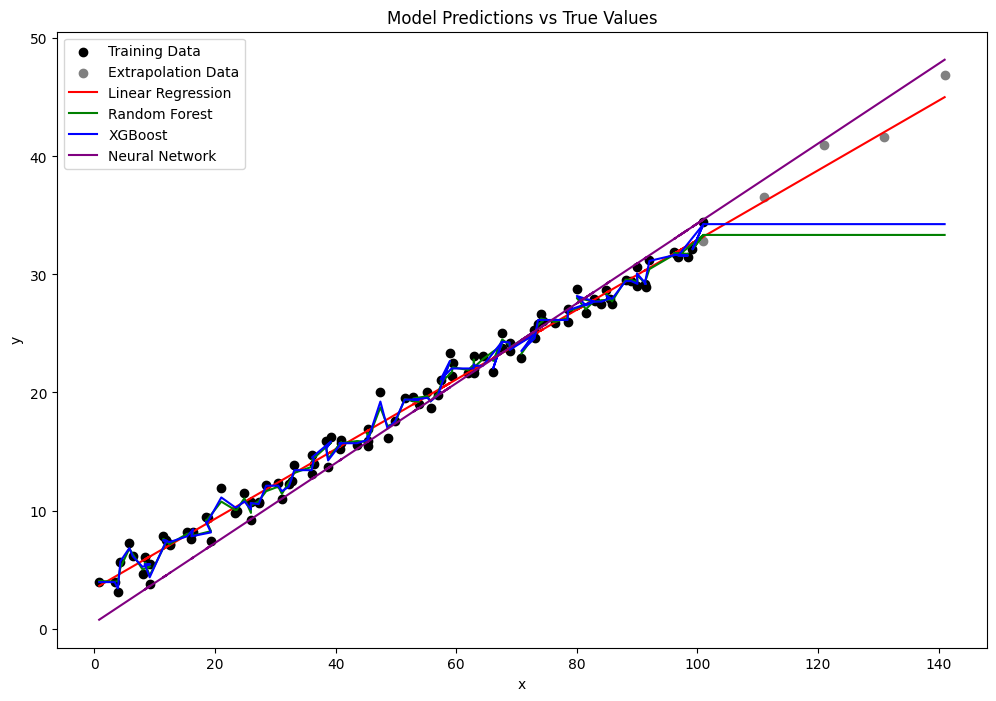

In [3]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, color='black', label='Training Data')
plt.scatter(x_test[len(x_train):], y_test[len(x_train):], color='gray', label='Extrapolation Data')
plt.plot(x_test, y_pred_linear, label='Linear Regression', color='red')
plt.plot(x_test, y_pred_rf, label='Random Forest', color='green')
plt.plot(x_test, y_pred_xgb, label='XGBoost', color='blue')
plt.plot(x_test, y_pred_nn, label='Neural Network', color='purple')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs True Values')
plt.show()